# Statistical Tests Notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

SEED=42
np.random.seed(SEED)

In [2]:
import seaborn as sns
sns.set_style('darkgrid')

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
%config InlineBackend.figure_format='retina' # very useful command for high-res images

In [3]:
# set the username for the path of the files:
#user='LB'
user='AF'

if user=='LB':
    file_path='/home/lorenzo/Desktop/Astrophysics/PYTHON/DATA/CGRO_BATSE/'
elif user=='AF':
    file_path='E:/grb_to_test/CGRO_BATSE/'
    sim_path = 'E:/grb_to_test/simulations/'
else:
    raise ValueError('Assign to the variable "user" a correct username!')

In [35]:
grb_to_plot = "00108_all_bs.out"
times, counts, errors = np.loadtxt(file_path+grb_to_plot, unpack = True)

(-5.0, 5.0)

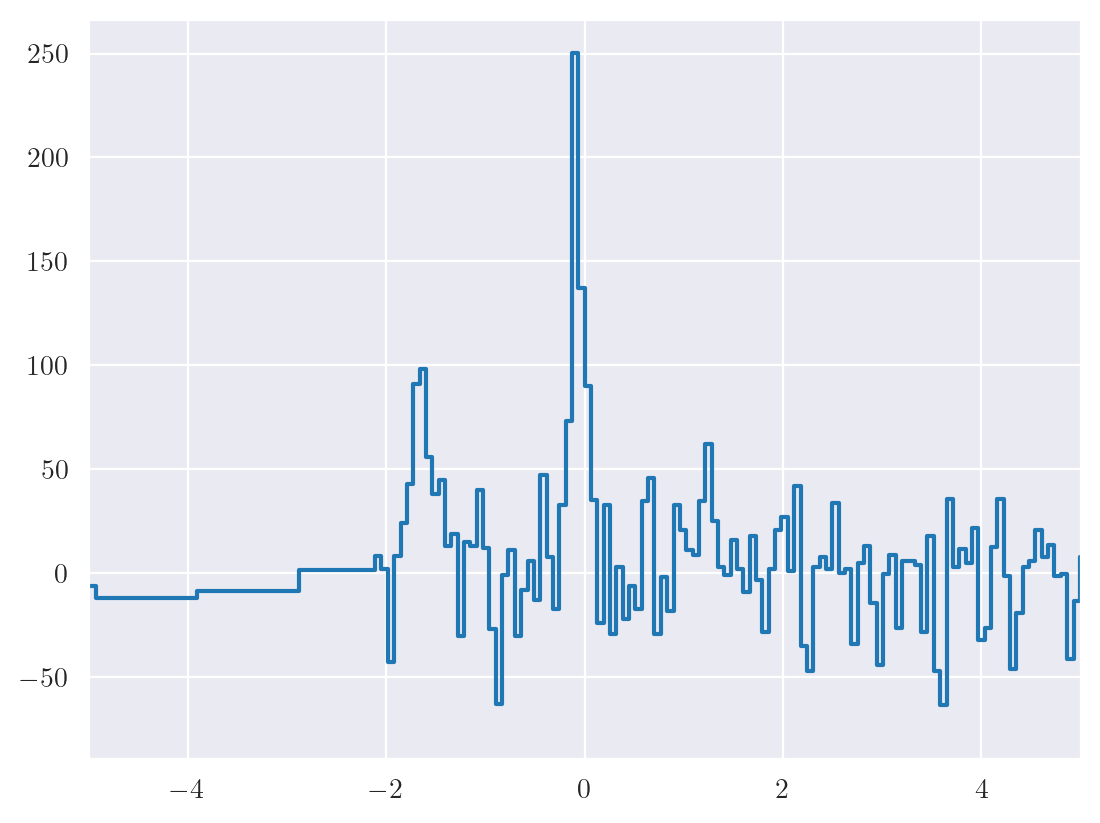

In [37]:
fig = plt.figure()
ax = fig.add_subplot()
ax.step(times, counts, where = 'pre')
ax.set_xlim(-5,5)


## Sample 1: BASTE Data

### Test 1: Duration (T90) distribution <br>
__T90 definition__ <br> 
The 90% duration of the burst in seconds. T90 measures the duration of the time interval during which 90% of the total observed counts have been detected. The start of the T90 interval is defined by the time at which 5% of the total counts have been detected, and the end of the T90 interval is defined by the time at which 95% of the total counts have been detected. <br>
_(definition from: https://heasarc.gsfc.nasa.gov/grbcat/notes.html)_ <br>


NB: For BATSE, all the T90s of the GRBs have been already evaluated by Cristiano. The file is uploaded on the repository for easier access. <br>
_(file path on Gravity: `/astrodata/guidorzi/CGRO_BATSE/T90_full.dat`, file path on the repository: `lc_pulse_avalance/statistical_tests/cgro_batse/T90_full.dat`)_


In [99]:
filename='T90_full.dat'

grb_real, t90_real, t90_real_error = np.loadtxt(file_path+filename, unpack=True)
log10_t90 = np.log10(t90_real)


#### T90 Calculation function
A function to evaluate the T90 of a GRB given 
1. times of the lightcurve bins, and
2. counts per bin 

In [150]:
np.set_printoptions(threshold=sys.maxsize)
def evaluateT90(times, counts):
    acceptable_range = 0.05
    #cumulative_counts = np.cumsum(counts)/np.sum(counts)
  
    #t_5  = times[np.where(cumulative_counts =  5)[0][0]]
    #t_95 = times[np.where(cumulative_counts = 95)[0][0]]
    cumulative_counts = np.cumsum(counts)/np.sum(counts)
    t_5  = times[np.where(np.logical_and(cumulative_counts >=  0.05 -acceptable_range ,cumulative_counts <=  0.05+ acceptable_range))[0][0]]
    t_95 = times[np.where(np.logical_and(cumulative_counts >=  0.95 -acceptable_range ,cumulative_counts <=  0.95+ acceptable_range))[0][0]]
    return t_95-t_5

Evaluate T90 for the simulated GRBs

In [151]:
# Simulated GRBs:
grb_list = os.listdir(sim_path)
#grb_list = ["lc1.txt"]    

t90_sim = []
for grb in grb_list:
    print(grb)
    times, counts = np.loadtxt(sim_path+grb, unpack=True)
    t90_sim.append(evaluateT90(times, counts))

log10_t90_sim = np.log10(t90_sim)

lc0.txt
lc1.txt
lc10.txt
lc100.txt
lc101.txt
lc102.txt
lc103.txt
lc104.txt
lc105.txt
lc106.txt
lc107.txt
lc108.txt
lc109.txt
lc11.txt
lc110.txt
lc111.txt
lc112.txt
lc113.txt
lc114.txt
lc115.txt
lc116.txt
lc117.txt
lc118.txt
lc119.txt
lc12.txt
lc120.txt
lc121.txt
lc122.txt
lc123.txt
lc124.txt
lc125.txt
lc126.txt
lc127.txt
lc128.txt
lc129.txt
lc13.txt
lc130.txt
lc131.txt
lc132.txt
lc133.txt
lc134.txt
lc135.txt
lc136.txt
lc137.txt
lc138.txt
lc139.txt
lc14.txt
lc140.txt
lc141.txt
lc142.txt
lc143.txt
lc144.txt
lc145.txt
lc146.txt
lc147.txt
lc148.txt
lc149.txt
lc15.txt
lc150.txt
lc151.txt
lc152.txt
lc153.txt
lc154.txt
lc155.txt
lc156.txt
lc157.txt
lc158.txt
lc159.txt
lc16.txt
lc160.txt
lc161.txt
lc162.txt
lc163.txt
lc164.txt
lc165.txt
lc166.txt
lc167.txt
lc168.txt
lc169.txt
lc17.txt
lc170.txt
lc171.txt
lc172.txt
lc173.txt
lc174.txt
lc175.txt
lc176.txt
lc177.txt
lc178.txt
lc179.txt
lc18.txt
lc180.txt
lc181.txt
lc182.txt
lc183.txt
lc184.txt
lc185.txt
lc186.txt
lc187.txt
lc188.txt
lc189.txt
lc1

IndexError: index 0 is out of bounds for axis 0 with size 0

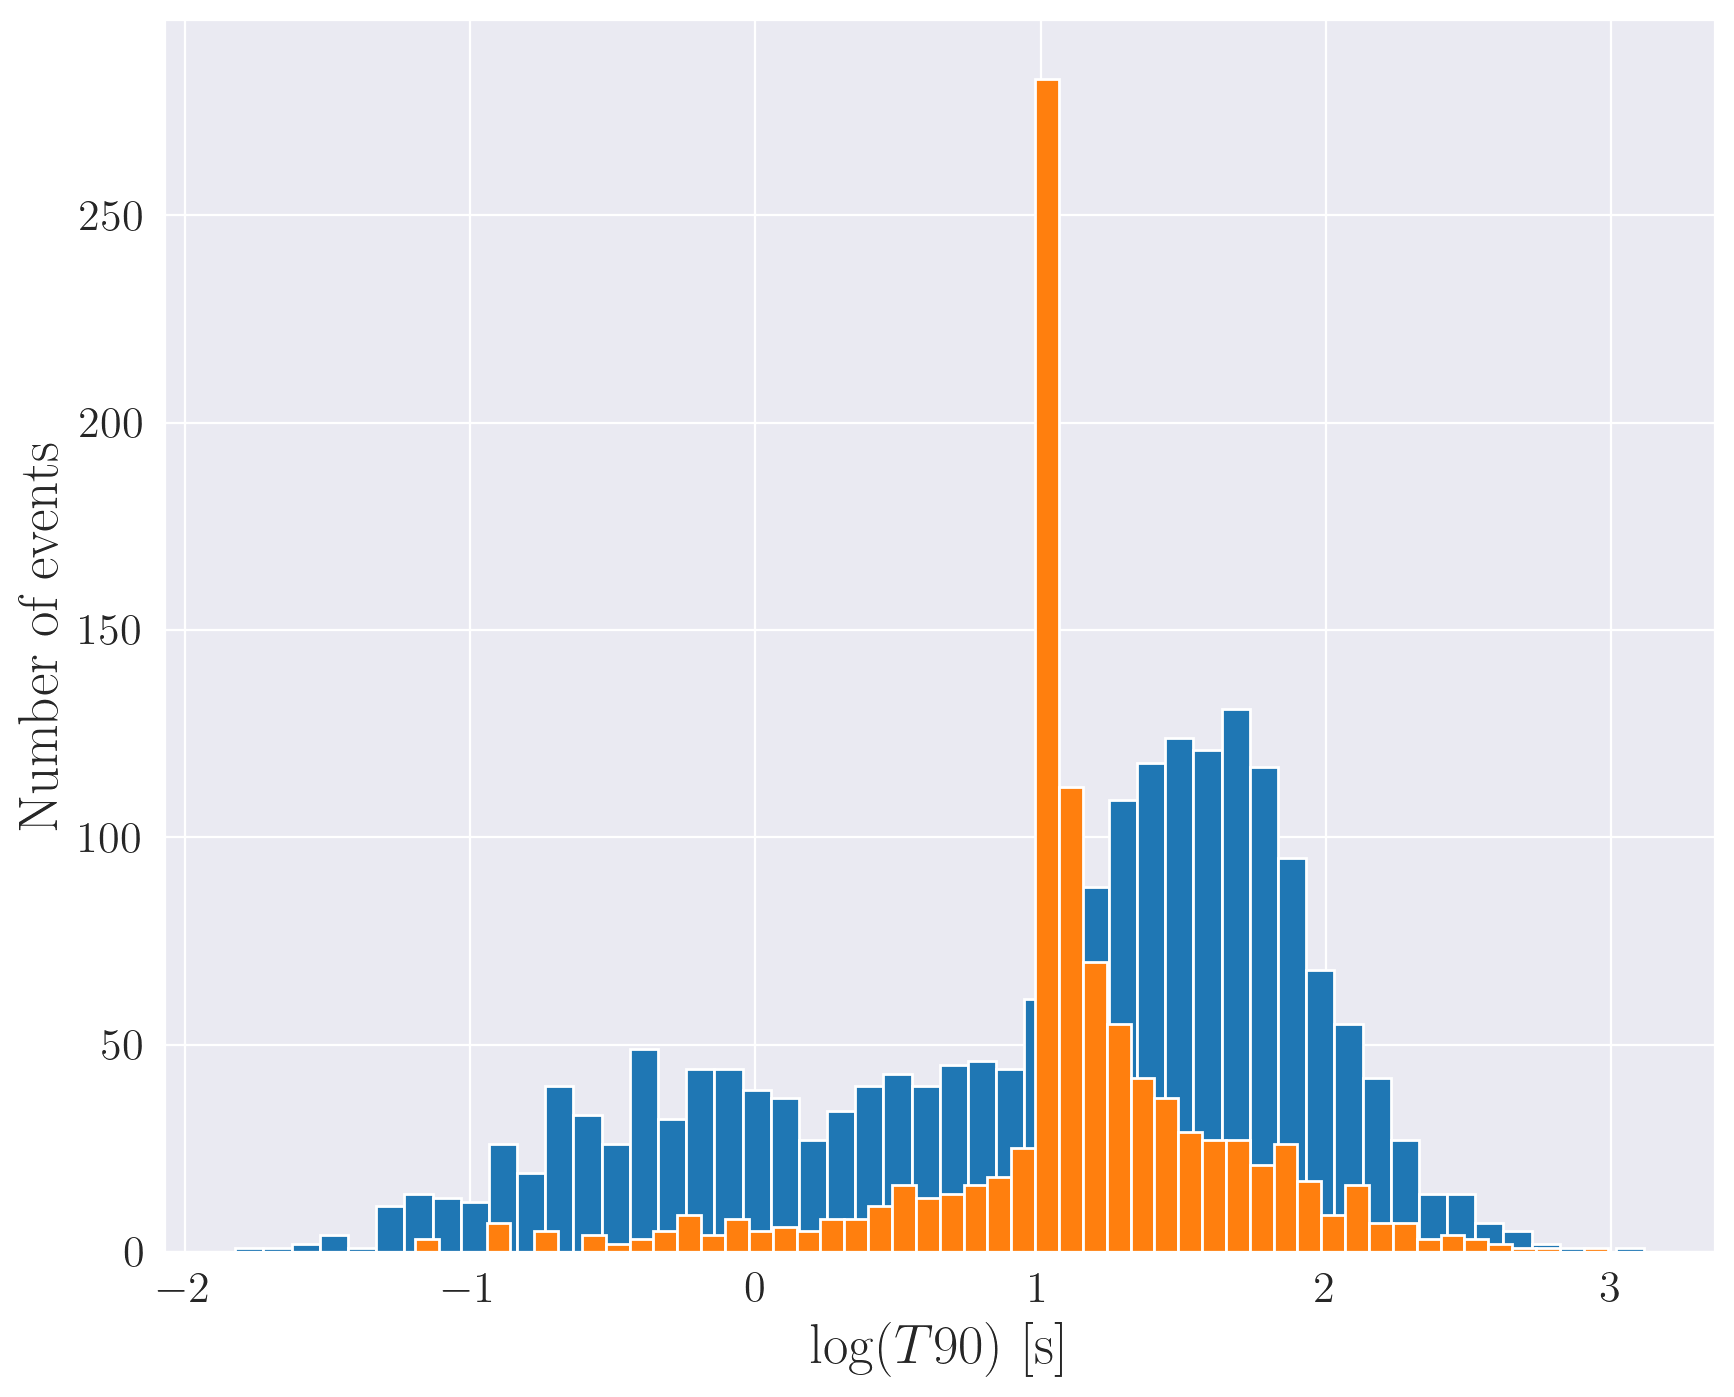

In [120]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()
ax.set_axisbelow(True)
#ax.grid(which = 'both')
ax.set_ylabel('Number of events', size=20)
ax.set_xlabel(r'$\log(T90)$ [s]', size=20)

n, bins, patches = ax.hist(log10_t90, 
                           bins=30)
                           #facecolor='lightgrey',
                           #edgecolor='black')

log10_t90_sim = log10_t90_sim[log10_t90_sim != -np.inf]
n, bins, patches = ax.hist(log10_t90_sim, 
                           bins=30)
                           #facecolor='lightgrey',
                           #edgecolor='black')

ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

## Test 2: Average Peak-Aligned Profiles

Following the technique described in Mitranof et al., 1996 (https://ui.adsabs.harvard.edu/abs/1996MmSAI..67..417M/abstract) and working on the time interval from 0 to 150 s from the peak (as done in Stern+1996)

#### (WIP)

In [171]:
###########                  TEST ON A BUNCH OF GRBs                                  ############
########### TESTED on all the GRBs in alltrig_long.list and alltrig_short.list        ############

t_i=0          # [s]
t_f=150        # [s]
bin_time=0.064 # [s] temporal bins for BATSE

# small sample of GRBs:
#grb_list = ["00105_all_bs.out","00107_all_bs.out","00108_all_bs.out","00109_all_bs.out","00110_all_bs.out"]

# full sample of GRBs:
grb_list = [grb_num.rstrip('\n') + '_all_bs.out' for grb_num         \
            in open(file_path + 'alltrig_long.list').readlines()] +  \
            [grb_num.rstrip('\n') + '_all_bs.out' for grb_num        \
            in open(file_path + 'alltrig_short.list').readlines()]

test_times      = np.arange(t_i, t_f, bin_time) # Same time range as in Stern+1996
averaged_fluxes = np.zeros_like(test_times)
averaged_fluxes_square = np.zeros_like(test_times)
averaged_fluxes_cube = np.zeros_like(test_times)

for grb in grb_list:
    times, counts, errs = np.loadtxt(file_path+grb, unpack=True)
    c_max   = np.max(counts)
    i_t_max = np.where(counts == c_max)[0][0] # LB: you can also use 'np.argmax()' here
    t_max   = times[i_t_max]
    counts_to_sum = counts[i_t_max:i_t_max + len(test_times)] / c_max
    if len(counts_to_sum) < len(test_times):
        counts_to_sum = np.concatenate([counts_to_sum, [0]*(len(test_times) - len(counts_to_sum))])
    averaged_fluxes += counts_to_sum
    averaged_fluxes_square += counts_to_sum**2
    averaged_fluxes_cube += counts_to_sum**3

averaged_fluxes /= len(grb_list)
averaged_fluxes_square /= len(grb_list)
averaged_fluxes_cube /= len(grb_list)
averaged_fluxes_rms = np.sqrt( averaged_fluxes_square  - averaged_fluxes**2)

#Plot of <F/Fp> and <(F/Fp)^3> in the next cell

Note: some negative values (close to zero) appearing for $t^{1/3} > 4$. 

LB: @AF, Cristiano ha detto di ribinnare la parte finale della curva, in modo tale che quei bin contengano un segnale significativo (i.e., $>1 \sigma$, o almeno che sia positivo). 

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  
c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


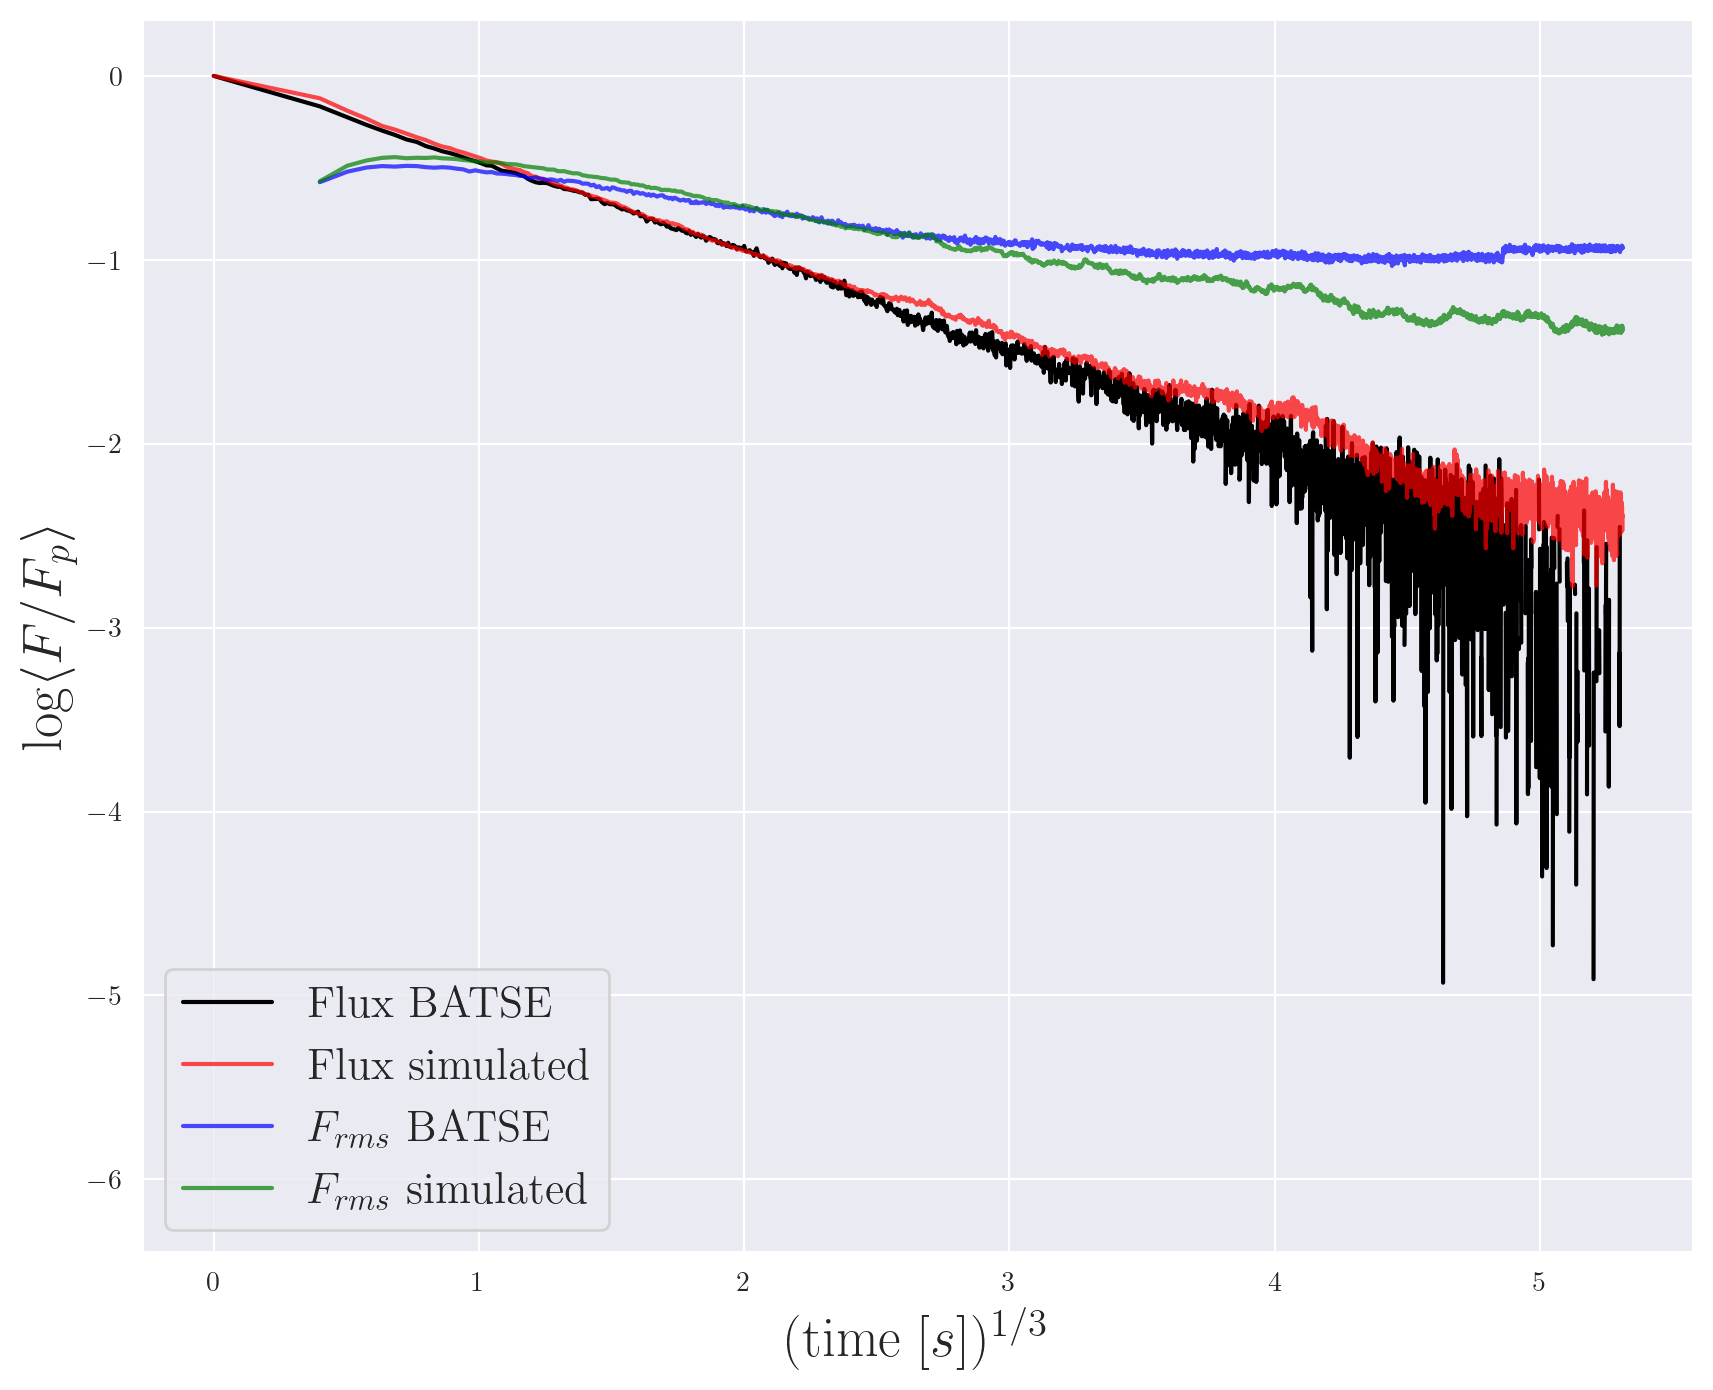

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in log10


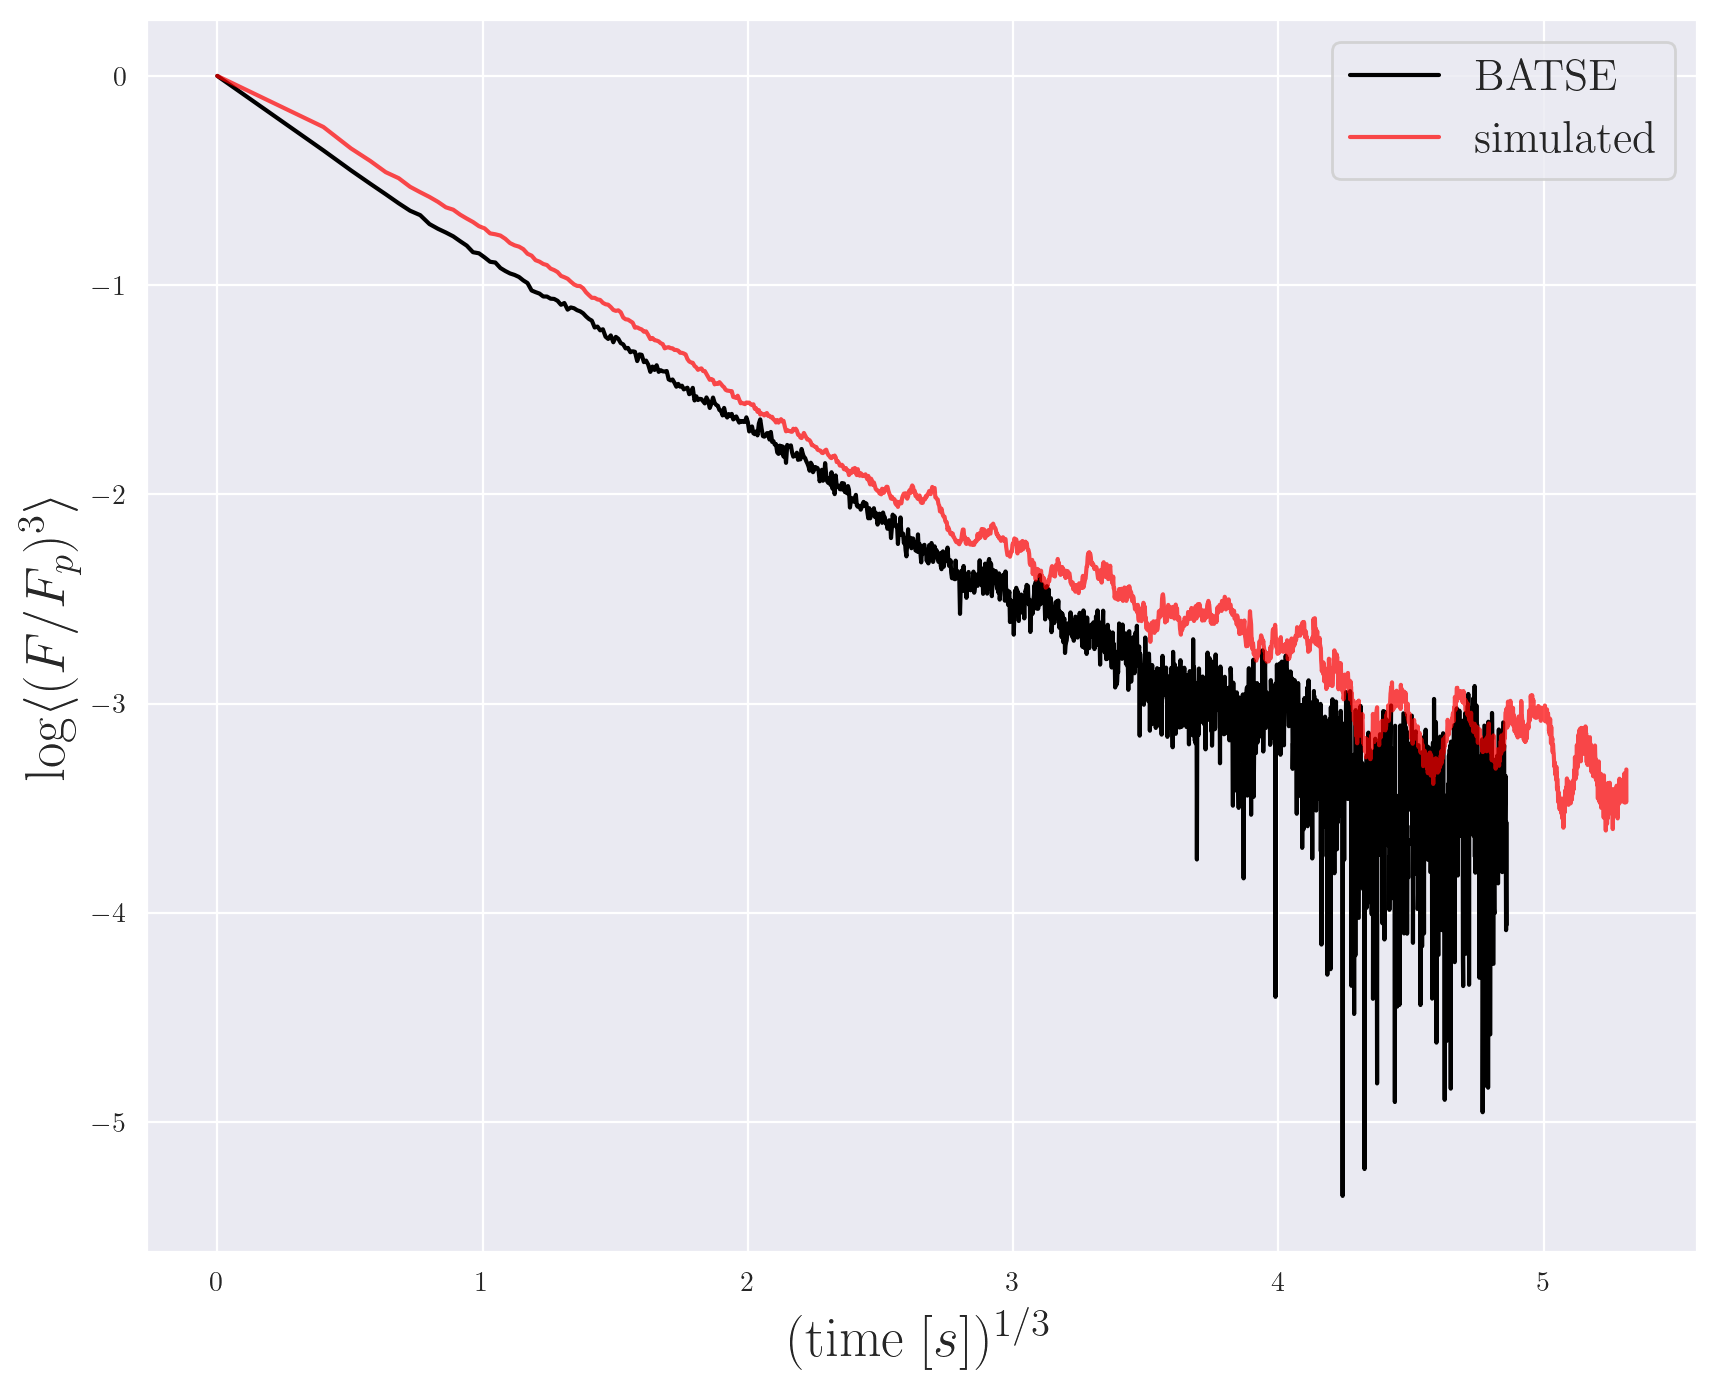

In [178]:
simulations_file = './simulations.txt'
simulated_times, simulated_fluxes, sim_frms, sim_flux_cube  = np.loadtxt(simulations_file, unpack=True)
n_step_sim       = int(t_f/bin_time)
simulated_times  = np.array(simulated_times[:n_step_sim])
simulated_fluxes = np.array(simulated_fluxes[:n_step_sim])
sim_frms = np.array(sim_frms[:n_step_sim])
sim_flux_cube = np.array(sim_flux_cube[:n_step_sim])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()
ax.set_axisbelow(True)
#ax.grid(which = 'both')
ax.set_ylabel('log <F/Fp>')
ax.set_xlabel(r'$(\mathrm{time}\ [s])^{1/3}$', size=20)
ax.set_ylabel(r'$\log \langle F/F_p\rangle$',  size=20)
ax.plot(test_times**(1/3), np.log10(averaged_fluxes),  color = 'black', label = r'Flux BATSE')
ax.plot(simulated_times**(1/3), np.log10(simulated_fluxes),      color = 'red',   label = r'Flux simulated', alpha=0.7)

ax.plot(test_times**(1/3), np.log10(averaged_fluxes_rms),  color = 'blue', label = r'$F_{rms}$ BATSE', alpha=0.7)
ax.plot(simulated_times**(1/3), np.log10(sim_frms),      color = 'green',   label = r'$F_{rms}$ simulated', alpha=0.7)
ax.legend(prop={'size':16})
plt.show()


fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()
ax.set_axisbelow(True)
#ax.grid(which = 'both')
ax.set_xlabel(r'$(\mathrm{time}\ [s])^{1/3}$', size=20)
ax.set_ylabel(r'$\log \langle (F/F_p)^3 \rangle$',  size=20)
ax.plot(test_times**(1/3), np.log10(averaged_fluxes_cube), color = 'black', label = 'BATSE')
ax.plot(simulated_times**(1/3), np.log10(sim_flux_cube),      color = 'red',   label = 'simulated', alpha=0.7)
ax.legend(prop={'size':16})
plt.show()

Note: Going at late times, the data start to be very scattered. Maybe we have to make a selection of GRBs to use for the plot?

## Test 3: Autocorrelation

Following the technique described in Link et al. 1993 (https://ui.adsabs.harvard.edu/abs/1993ApJ...408L..81L/abstract)

#### (WIP)
Probably not working at the moment

In [21]:
import statsmodels.api as sm

t_i=0          # [s]
t_f=150        # [s]
bin_time=0.064     # [s]

# small sample of GRBs:
#grb_list  = ["00105_all_bs.out","00107_all_bs.out","00108_all_bs.out","00109_all_bs.out","00110_all_bs.out"]

# full sample of GRBs:
grb_list = [grb_num.rstrip('\n') + '_all_bs.out' for grb_num         \
            in open(file_path + 'alltrig_long.list').readlines()] +  \
            [grb_num.rstrip('\n') + '_all_bs.out' for grb_num        \
            in open(file_path + 'alltrig_short.list').readlines()]

#Simulated GRBs:
sim_grb_list = os.listdir(sim_path)

#Limits the number of GRBs to use
N_LIM=600 # len(grb_list)

#Number of steps for ACF
steps = np.arange(int(t_f/bin_time))

#Evaluate ACF on the real GRBs
acf_python = np.zeros_like(steps)
acf_link93 = np.zeros_like(steps)
for grb in grb_list[:N_LIM]:
    #times, counts = np.loadtxt(path+'/'+grb, unpack=True)
    times, counts, errs = np.loadtxt(file_path+grb, unpack=True)
    #
    errs=0
    acf_link93 = acf_link93 + [np.sum((np.roll(counts, u) * counts)[u:]) / np.sum(counts**2 - errs**2) for u in range(len(steps))]
    #
    acf_python = acf_python + sm.tsa.acf(counts, nlags = len(steps) -1)

#Evaluate ACF on the simulated GRBs
sim_acf_python = np.zeros_like(steps)
sim_acf_link93 = np.zeros_like(steps)
for grb in sim_grb_list[:N_LIM]:
    times, counts = np.loadtxt(sim_path + grb, unpack=True)
    #
    errs=0
    sim_acf_link93 = sim_acf_link93 + [np.sum((np.roll(counts, u) * counts)[u:]) / np.sum(counts**2 - errs**2) for u in range(len(steps))]
    #
    sim_acf_python = sim_acf_python + sm.tsa.acf(counts, nlags = len(steps) -1)

sim_acf_python /= N_LIM
sim_acf_link93 /= N_LIM
sim_acf_link93[0]=1

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


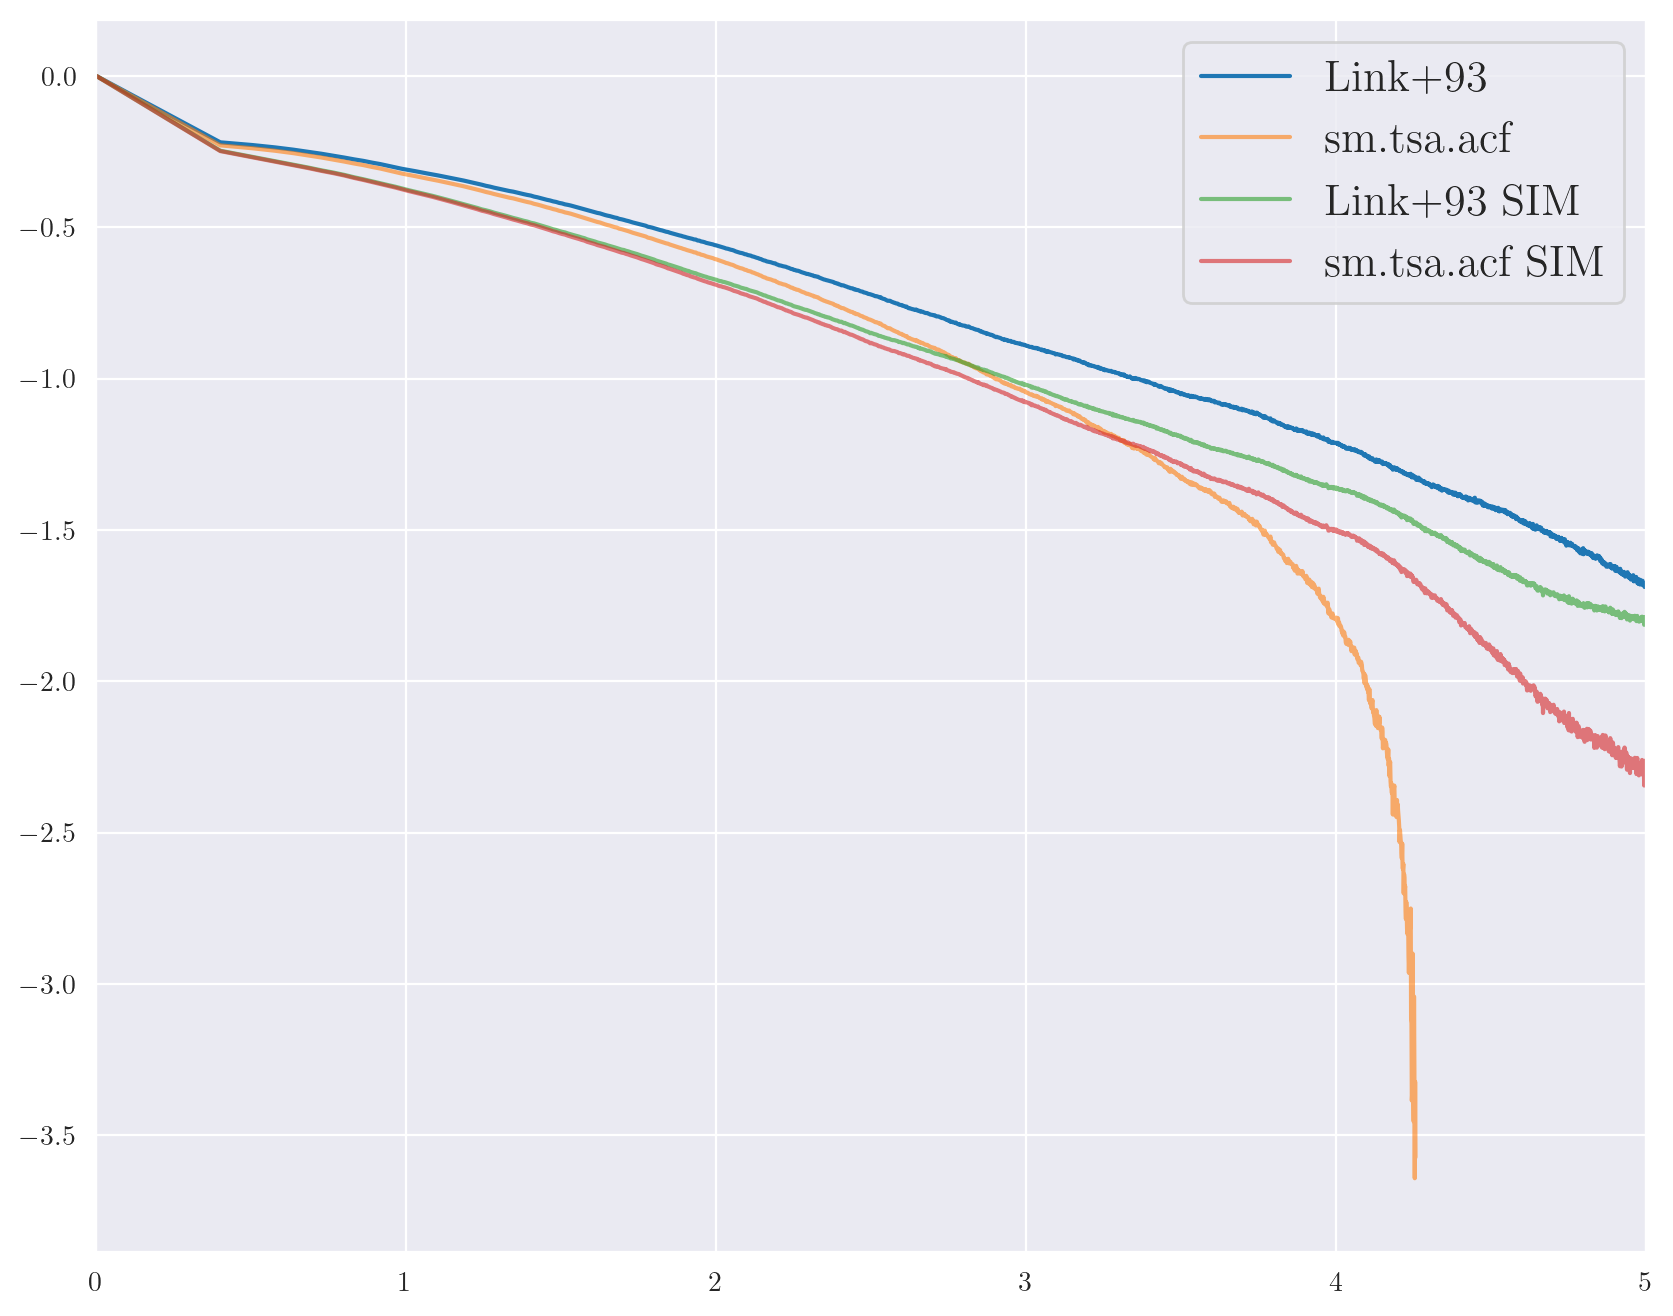

In [22]:
#Plot average acf
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()
#ax.grid()
ax.plot((steps*bin_time)**(1/3), np.log10(acf_test), label='Link+93')
ax.plot((steps*bin_time)**(1/3), np.log10(acf),      label='sm.tsa.acf', alpha=0.6)
ax.plot((steps*bin_time)**(1/3), np.log10(acf_test_sim), label='Link+93 SIM', alpha = 0.6)
ax.plot((steps*bin_time)**(1/3), np.log10(acf_sim),      label='sm.tsa.acf SIM', alpha=0.6)
#ax.set_ylim(-2,0)
ax.set_xlim(0,5)
ax.legend(prop={'size':16})
plt.show()

In [86]:
print(acf[0])
print(acf_test[0])

0.05202913631633715
0.0386251467918471


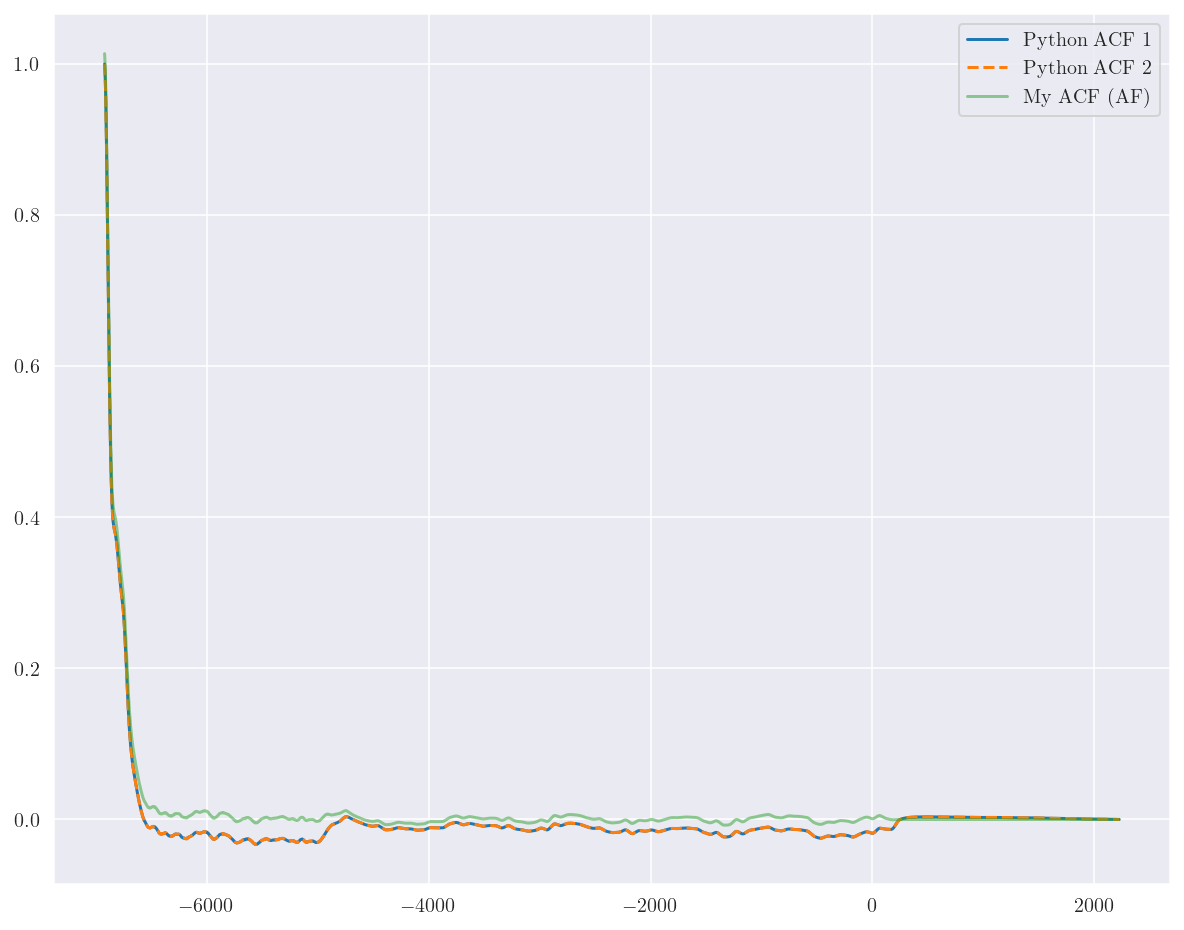

In [68]:
#AUTOCORRELATION TEST CELL
#Testo qui alcuni metodi per fare autocorrelazione con Python su dei dati più semplici da interpretare
import statsmodels.api as sm

fig = plt.figure(figsize=(10,8))

#Sin(theta/2) data
#times  = np.arange(0, 2*np.pi, 0.1)
#counts = np.sin(times * 2)
#error = np.random.rand() *0.1

#GRB data
#Test on 1 GRB
times, counts, error = np.loadtxt(file_path+"00105_all_bs.out", unpack=True)

#plt.errorbar(times*180/np.pi, counts, yerr = error, label = 'Data')

#With function in statsmodels
acorr = sm.tsa.acf(counts, nlags = len(times)-1)
plt.plot(times*180/np.pi, acorr, label = 'Python ACF 1')

#With numpy correlate. Code taken from:
#https://scicoding.com/4-ways-of-calculating-autocorrelation-in-python/#:~:text=Autocorrelation%20is%20a%20function%20that,algorithm%20in%20Python%20using%20autocorrelation.
data = counts
# Mean
mean = np.mean(data)
# Variance
var = np.var(data)
# Normalized data
ndata = data - mean
acorr = np.correlate(ndata, ndata, 'full')[len(ndata)-1:] 
acorr = acorr / var / len(ndata)
plt.plot(times*180/np.pi, acorr, ls='--', label = 'Python ACF 2')

#The code I used above
acf = [np.sum((np.roll(counts, u) * counts)[u:]) / np.sum(counts**2 - error**2) for u in range(len(times))]
plt.plot(times*180/np.pi, acf, label = 'My ACF (AF)', alpha = 0.5)
plt.legend(prop={'size':16})
plt.show()
#Some notes:
#If the error are small w.r.t. data, the three codes are equivalent. The two python codes does not factor in the contribution of the error.
#If the error start to be not negligible, the results start to differ.